In [ ]:
!pip list

In [ ]:
%pip install pandas numpy matplotlib seaborn scikit-learn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("car_data.csv")

In [4]:
print(df.shape)
df.head(3)

(892, 6)


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


#### null values are present in 
#### kms_driven and fuel_type

## Feature Engineering

In [6]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [ ]:
df['name'].unique()

##### Name column is too much big. we only keep the first three words

In [8]:
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Maruti', 'Ford', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'I', 'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat',
       'Commercial', 'MARUTI', 'Force', 'Mercedes', 'Land', 'Yamaha',
       'selling', 'URJENT', 'Swift', 'Used', 'Jaguar', 'Jeep', 'tata',
       'Sale', 'very', 'Volvo', 'i', '2012', 'Well', 'all', '7', '9',
       'scratch', 'urgent', 'sell', 'TATA', 'Any', 'Tara'], dtype=object)

In [ ]:
df[df['company'] == 'Force']

##### All the peculier company name has kms_driven as null

In [ ]:
df['Price'].unique()

In [10]:
df[df['Price'] == 'Ask For Price']
# must remove these

,name,company,year,Price,kms_driven,fuel_type
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
5,Ford EcoSport Titanium 1.5L TDCi,Ford,2015,Ask For Price,"59,000 kms",Diesel
69,I want to sell my car Tata Zest,I,2017,Ask For Price,NaN,NaN
85,I want to sell my car Tata Zest,I,2017,Ask For Price,NaN,NaN
138,Maruti Suzuki Alto 800 Lxi,Maruti,2018,Ask For Price,"28,028 kms",Petrol
185,"Commercial , DZire LDI, 2016, for sale",Commercial,...,Ask For Price,NaN,NaN
286,"Commercial , DZire LDI, 2016, for sale",Commercial,...,Ask For Price,NaN,NaN
295,Maruti Suzuki Swift LDi,Maruti,2010,Ask For Price,"52,000 kms",Diesel
304,Tata Indica eV2 LS,Tata,2017,Ask For Price,"84,000 kms",Diesel
360,selling car Ta,selling,Zest,Ask For Price,NaN,NaN


##### Price has string value and commas. need to convert to int

In [ ]:
df['kms_driven'].unique()

##### kms_driven has comma, 'kms' keyword in the column. nedd to convert it to int

In [12]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [13]:
df[df['fuel_type'].isnull()]

,name,company,year,Price,kms_driven,fuel_type
69,I want to sell my car Tata Zest,I,2017,Ask For Price,NaN,NaN
85,I want to sell my car Tata Zest,I,2017,Ask For Price,NaN,NaN
132,Toyota Corolla,Toyota,2009,"2,75,000","26,000 kms",NaN
185,"Commercial , DZire LDI, 2016, for sale",Commercial,...,Ask For Price,NaN,NaN
195,"Tata indigo ecs LX, 201",Tata,150k,"1,50,000",NaN,NaN
206,MARUTI SUZUKI DESI,MARUTI,TOUR,"4,00,000",NaN,NaN
286,"Commercial , DZire LDI, 2016, for sale",Commercial,...,Ask For Price,NaN,NaN
294,Yama,Yamaha,r 15,"55,000",NaN,NaN
360,selling car Ta,selling,Zest,Ask For Price,NaN,NaN
368,Tata Zest 90,Tata,/-Rs,Ask For Price,NaN,NaN


##### fule_type is fine. Although has null values

In [14]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

##### year has a lot of nonsense data

## cleaning

In [15]:
backup_df = df.copy()

In [ ]:
df = backup_df.copy() # use only for backup

In [16]:
# clean the nonsense values
df = df[df['year'].str.isnumeric()]
# convert to int
df['year'] = df['year'].astype(int)

In [17]:
# clean the nonsense values
df = df[df['Price'] != 'Ask For Price']
# convert to int
df['Price'] = df['Price'].str.replace(',','').astype(int)

In [18]:
# remove kms
temp_df = df[df['kms_driven'].str.contains('kms')]
temp_df['kms_driven'] = temp_df['kms_driven'].str[:-4]


/var/folders/hd/25__q2rn1yb9855zckz30xrm0000gn/T/ipykernel_7986/2451788671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['kms_driven'] = temp_df['kms_driven'].str[:-4]


In [19]:
temp_df['kms_driven']=temp_df['kms_driven'].str.replace(',','').astype(int)

/var/folders/hd/25__q2rn1yb9855zckz30xrm0000gn/T/ipykernel_7986/3234043303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['kms_driven']=temp_df['kms_driven'].str.replace(',','').astype(int)


In [20]:
df = temp_df

In [21]:
df = df[df['fuel_type'].isnull()==False]

In [22]:
df['name'] = df['name'].str.split(" ").str.slice(0,3).str.join(" ")

/var/folders/hd/25__q2rn1yb9855zckz30xrm0000gn/T/ipykernel_7986/3129767846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'] = df['name'].str.split(" ").str.slice(0,3).str.join(" ")


In [23]:
df = df.reset_index(drop=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [25]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


##### it can be observed that price of 75% cars are less than 5 lakhs. 
#### But max value of price is 85 lakhs. 
## so there is a probablity that there are outliers in the data

In [26]:
df = df[df['Price']<=2e6].reset_index(drop=True)

we checked and found out that only 7 cars were above 20 lakhs. So we neglected them

In [27]:
df.to_csv("cleaned_car_data.csv")

## Model Training

In [28]:
df.head(3)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol


In [29]:
X = df.drop(columns=['Price'])
y = df['Price']

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [31]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [32]:
X = preprocessor.fit_transform(X)

In [33]:
print(X.shape)
print(len(y))

(809, 276)
809


In [185]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [181]:
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(647, 276)
(162, 276)
647
162


In [34]:
print("Numeric features :     " , num_features)
print("Catagory features :     " , cat_features)

Numeric features :      Index(['year', 'kms_driven'], dtype='object')
Catagory features :      Index(['name', 'company', 'fuel_type'], dtype='object')


## Trying the base models

## Linear Regression

In [37]:
score_state_list= []
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=i)
    linear_base_model = LinearRegression()
    linear_base_model.fit(X_train,y_train)
    pred_test_lin = linear_base_model.predict(X_test)
    score_state_list.append(r2_score(y_test,pred_test_lin))

In [38]:
best_split_lin = score_state_list[np.argmax(score_state_list)]

## Descision Tree

In [39]:
score_state_list = []
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=i)
    dtree_base_model = DecisionTreeRegressor(max_depth=6)
    dtree_base_model.fit(X_train,y_train)
    pred_test_dtree = dtree_base_model.predict(X_test)
    score_state_list.append(r2_score(y_test,pred_test_dtree))


In [40]:
best_split_dtree = score_state_list[np.argmax(score_state_list)]

## Random Forest

In [41]:
score_state_list = []
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=i)
    rf_base_model = RandomForestRegressor(max_depth=6)
    rf_base_model.fit(X_train,y_train)
    pred_test_rf = rf_base_model.predict(X_test)
    score_state_list.append(r2_score(y_test,pred_test_rf))

In [42]:
best_split_rf = score_state_list[np.argmax(score_state_list)]

## AdaBoost

In [43]:
ada_base_model = AdaBoostRegressor()
ada_base_model.fit(X_train,y_train)
pred_train_ada = ada_base_model.predict(X_train)
pred_test_ada = ada_base_model.predict(X_test)
print(r2_score(y_train,pred_train_ada))
print(r2_score(y_test,pred_test_ada))

0.4788959020211181
-0.020441863595608734


## Gradient Boost

In [44]:
score_state_list = []
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=i)
    grad_base_model = GradientBoostingRegressor(max_depth=6)
    grad_base_model.fit(X_train,y_train)
    pred_test_grad = grad_base_model.predict(X_test)
    score_state_list.append(r2_score(y_test,pred_test_grad))

In [45]:
best_split_grad = score_state_list[np.argmax(score_state_list)]

/var/folders/hd/25__q2rn1yb9855zckz30xrm0000gn/T/ipykernel_7986/1875714680.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=["Linear Regression","Decision Tree","Random Forest","Gradient Boosting"],x=[best_split_lin,best_split_dtree,best_split_rf,best_split_grad],palette="pastel",);


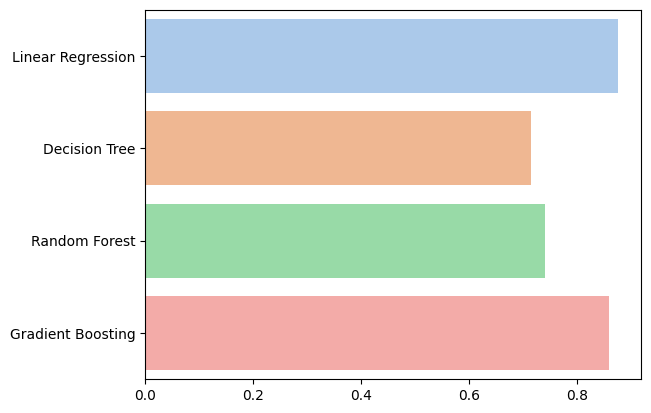

In [46]:
sns.barplot(y=["Linear Regression","Decision Tree","Random Forest","Gradient Boosting"],x=[best_split_lin,best_split_dtree,best_split_rf,best_split_grad],palette="pastel",);